In [23]:
import numpy as np
import pandas as pd

In [24]:
data = pd.read_csv("Customers.csv")
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
182,183,Male,46,98,15
67,68,Female,68,48,48
114,115,Female,18,65,48
22,23,Female,46,25,5
178,179,Male,59,93,14


In [25]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
194,120,16
45,39,65
122,69,58
108,63,43
165,85,75


In [26]:
data = data.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'})
data.sample(5)

,income,score
169,87,63
40,38,35
136,73,7
193,113,91
167,86,95


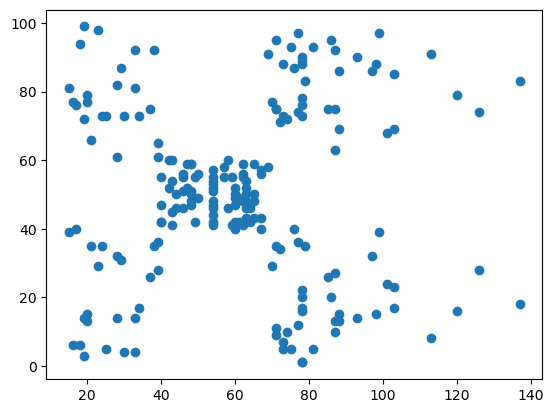

In [27]:
import matplotlib.pyplot as plt
plt.scatter(data['income'],data['score'])

In [28]:
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for i in k_values:
    model = KMeans(n_clusters=i)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_)

In [29]:
wcss_error

[269981.28,
 181665.8231292517,
 150538.92938233266,
 73679.78903948834,
 66465.14810226466,
 38788.45862332112,
 31969.426550235476,
 26969.83758778259,
 24495.828667791167,
 20736.679938924128]

Text(0, 0.5, 'WCSS error')

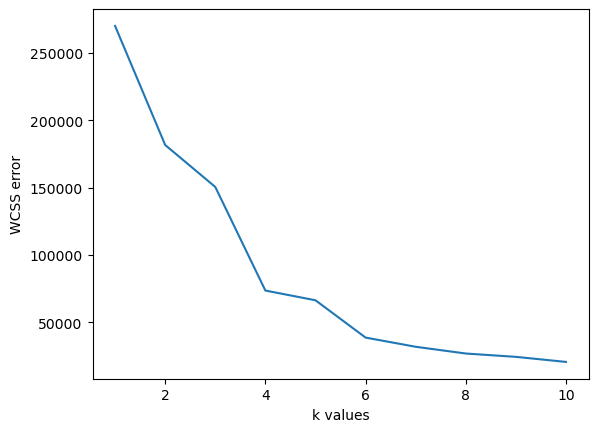

In [30]:
plt.plot(k_values,wcss_error)
plt.xlabel("k values")
plt.ylabel("WCSS error")

In [31]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
pred = model.fit_predict(data)

In [32]:
pred

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0], dtype=int32)

In [33]:
data.head(5)

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [34]:
data['Clusters'] = pred
data.head(5)

,income,score,Clusters
0,15,39,3
1,15,81,2
2,16,6,3
3,16,77,2
4,17,40,3


In [39]:
c1 = data[data['Clusters']==0]
c2 = data[data['Clusters']==1]
c3 = data[data['Clusters']==2]
c4 = data[data['Clusters']==3]
c5 = data[data['Clusters']==4]

In [40]:
c4.head()

,income,score,Clusters
0,15,39,3
2,16,6,3
4,17,40,3
6,18,6,3
8,19,3,3


In [48]:
model.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

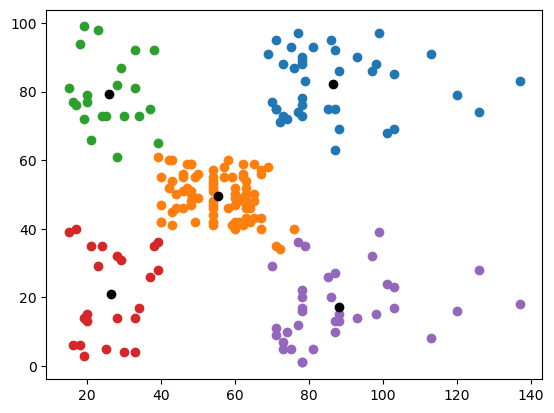

In [51]:
plt.scatter(c1['income'],c1['score'])
plt.scatter(c2['income'],c2['score'])
plt.scatter(c3['income'],c3['score'])
plt.scatter(c4['income'],c4['score'])
plt.scatter(c5['income'],c5['score'])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color ='black')